## Introduction

The MNIST dataset (Modified National Institute of Standards and Technology) is a large database of handwritten digits. It is widely used for training various image processing systems, machine learning models, and is often referred to as the "hello world" of machine learning. The dataset consists of 70,000 images of handwritten digits (0-9) and their corresponding labels, with each image being 28x28 pixels in size. The dataset is split into 60,000 training images and 10,000 testing images.

## Seasoned ML Practitioner's Approach

1. **Understand the Problem**: The MNIST dataset is primarily used for digit classification. This is a supervised learning problem where we want our model to learn the patterns and relationships in the training data so that it can accurately classify the handwritten digits in the test data.

2. **Exploratory Data Analysis (EDA)**: As with any dataset, it's important to perform EDA to understand the data's characteristics. For MNIST, this could include:
   - Visualizing some of the handwritten digits and their labels to get a sense of the data.
   - Checking the distribution of labels to see if the dataset is balanced or imbalanced.
   - Identifying any potential data quality issues, such as noise or outliers.

3. **Data Preprocessing**:
   - Normalization: The pixel values in the images are usually in the range [0, 255]. Normalizing these values to a smaller range, such as [0, 1], helps the model learn more efficiently.
   - Flattening: Each image in the MNIST dataset is a 28x28 pixel image. These can be flattened into a 1D array of 784 elements to be used as input for certain models.
   - One-Hot Encoding: The labels are integers from 0 to 9. These can be one-hot encoded to be used as targets for models that output a probability distribution over the 10 classes.

4. **Model Selection and Training**:
   - Choose appropriate machine learning algorithms for the classification task. For MNIST, popular choices include logistic regression, support vector machines, random forests, and neural networks.
   - Train the models on the training set, using techniques like cross-validation to tune hyperparameters and prevent overfitting.
   - Evaluate the models' performance on a validation set during training.

5. **Model Evaluation**:
   - Evaluate the trained models on the test set using appropriate metrics such as accuracy, confusion matrix, precision, recall, and F1 score.
   - Interpret the results in the context of the problem, identifying which digits the model classifies well and which it struggles with.
   - Compare the performance of different models to select the best one.

6. **Model Interpretation**:
   - Understand how the model makes its decisions by analyzing feature importance, activation maps, or other relevant techniques.

7. **Conclusion and Next Steps**:
   - Summarize the findings and provide insights for future work.
   - Explore potential improvements or extensions, such as using more complex models, data augmentation, or transfer learning.

Approaching the MNIST dataset with these steps in mind will help a seasoned ML practitioner develop a robust digit classification model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the shape of the data
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

11490434/11490434 [==============================] - 1s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


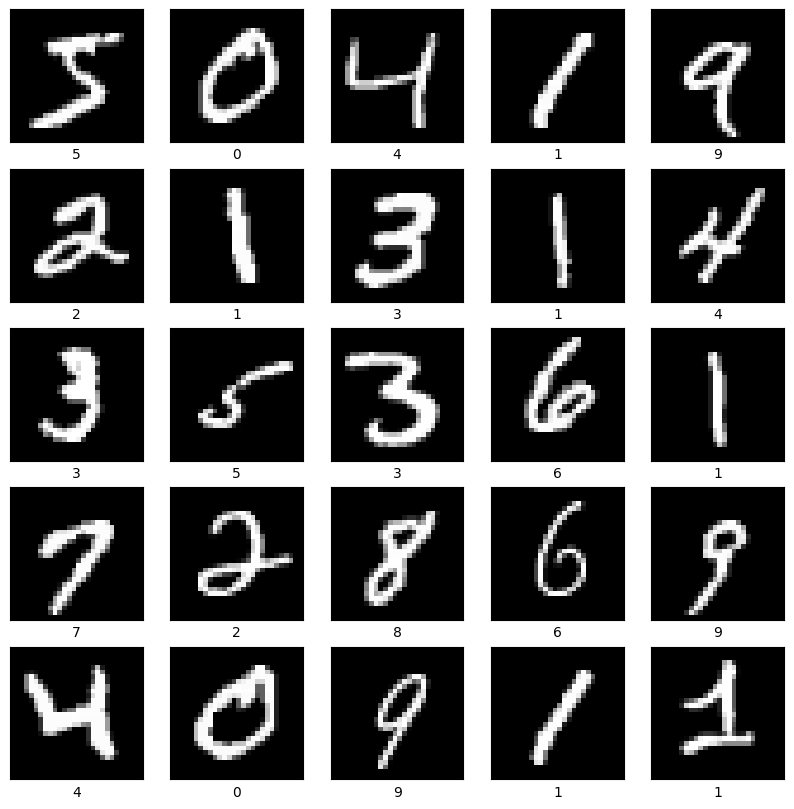

In [2]:
# Display some images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(str(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

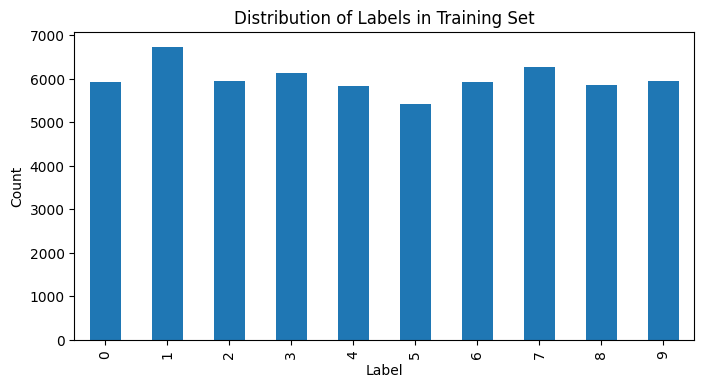

In [5]:
# Display the distribution of the labels in the training set
label_counts = pd.Series(train_labels).value_counts()
plt.figure(figsize=(8, 4))
label_counts.sort_index().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Set')
plt.show()

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
train_labels[0]

5

The next steps of the Exploratory Data Analysis (EDA) would typically involve analyzing the quality of the data, such as noise or outliers, and checking the distribution of pixel values.

Here's the code to proceed with these steps, along with the thought processes of a seasoned ML practitioner:

1. **Analyze the Distribution of Pixel Values**:
   - It is helpful to check the distribution of pixel values to understand the range of values and whether the images have consistent brightness and contrast. If the pixel values vary significantly, it could affect the model's performance. In such cases, normalization or other preprocessing techniques may be needed.

```python
import matplotlib.pyplot as plt

# Load the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the distribution of pixel values in the training data
plt.figure(figsize=(8, 6))
plt.hist(X_train.ravel(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Pixel Values in the Training Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
```

2. **Check for Missing Data**:
   - Missing data can significantly impact the performance of machine learning models. It's crucial to check for missing data in the dataset and decide how to handle it, such as by removing or imputing missing values.

```python
import numpy as np

# Check for missing data in the training and test sets
missing_train = np.isnan(X_train).sum()
missing_test = np.isnan(X_test).sum()
print(f"Missing values in the training set: {missing_train}")
print(f"Missing values in the test set: {missing_test}")
```

3. **Visualize Some Images**:
   - It is essential to visualize some of the images in the dataset to understand the quality of the data and identify any potential issues, such as noise or outliers.

```python
# Visualize some images from the training set
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Digit: {y_train[i]}")

plt.subplots_adjust(hspace=0.5)
```

By analyzing the distribution of pixel values, checking for missing data, and visualizing some images, a seasoned ML practitioner can gain a better understanding of the dataset's quality and characteristics. This knowledge can help inform the preprocessing steps needed to prepare the data for modeling.

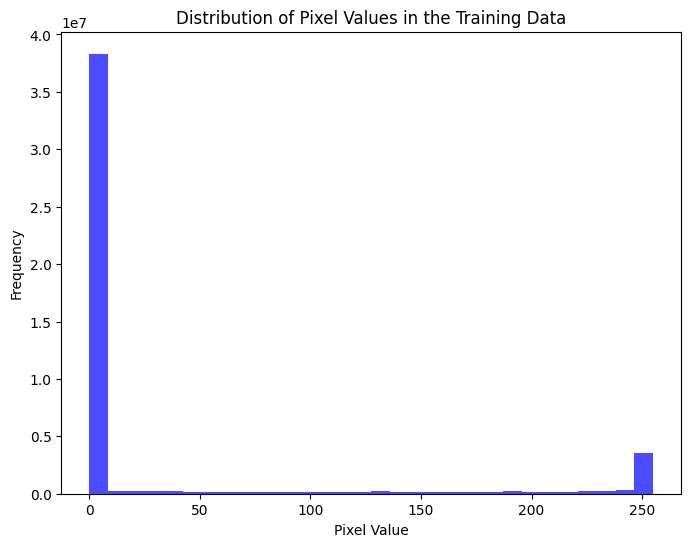

In [10]:
[X_train, y_train, X_test, y_test] = [train_images, train_labels, test_images, test_labels]

# Check the distribution of pixel values in the training data
plt.figure(figsize=(8, 6))
plt.hist(X_train.ravel(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Pixel Values in the Training Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

When analyzing the distribution of pixel values in an image dataset like MNIST, a seasoned ML practitioner would consider the following:

1. **Understanding the Pixel Value Range**: The observation that pixel values are primarily 0 and 255 is not surprising for the MNIST dataset. MNIST images are grayscale, and pixel values typically range from 0 to 255, where 0 represents black, 255 represents white, and values in between represent varying shades of gray. The high frequency of 0s and 255s indicates that most pixels are either fully black or fully white, which is expected for hand-written digits on a white background.

2. **Image Background**: The predominance of 0s (black pixels) suggests that the dataset mostly consists of images with a black background and white digits. This is important to know because the choice of background can affect the model's performance, especially when deploying the model to real-world scenarios with different background colors.

3. **Sparse Images**: The high frequency of black pixels (value 0) and the low frequency of gray pixels (values between 0 and 255) indicate that the images are sparse. In other words, most of the image area is black, with only a small portion containing the actual handwritten digit. This is typical for images of isolated objects, like handwritten digits, where the object of interest occupies only a small part of the image.

4. **Preprocessing Considerations**: Given the distribution of pixel values, the practitioner might consider preprocessing techniques to improve model performance. For example, normalization or standardization of pixel values can help scale the data to a more suitable range for training machine learning models. In this case, normalizing pixel values to the range [0, 1] by dividing by 255 is a common practice.

5. **Data Augmentation**: The practitioner might also consider data augmentation techniques to increase the diversity of the training data. This could involve rotating, shifting, or scaling the images to create new training examples and improve the model's ability to generalize to unseen data.

In summary, analyzing the distribution of pixel values helps the practitioner understand the characteristics of the images, the quality of the data, and the potential preprocessing steps needed to prepare the data for modeling.

In [11]:
import numpy as np

# Check for missing data in the training and test sets
missing_train = np.isnan(X_train).sum()
missing_test = np.isnan(X_test).sum()
print(f"Missing values in the training set: {missing_train}")
print(f"Missing values in the test set: {missing_test}")


Missing values in the training set: 0
Missing values in the test set: 0


When dealing with image data, it's important to visually inspect the images to identify potential data quality issues, such as noise, outliers, or mislabeled examples. These issues can adversely affect model performance, so it's essential to address them during the data preparation phase.

Here are some thought processes and steps a seasoned ML practitioner might take to identify data quality issues in the MNIST dataset:

1. **Visual Inspection of Random Images**: Display a random sample of images from the dataset and visually inspect them for any obvious issues. Look for images that may be blurry, contain artifacts, or have unusual backgrounds. This step helps identify any anomalies that might need further investigation.

2. **Visual Inspection of Extreme Cases**: Examine images with extreme pixel values, such as those with the highest or lowest average pixel values. These extreme cases can reveal potential outliers or images with unusual characteristics.

3. **Review Misclassified Examples**: After training an initial model, review the images that the model misclassified. This can help identify potential labeling errors, confusing examples, or other issues that might be affecting model performance.

4. **Statistical Analysis**: Perform statistical analysis on the pixel values to identify potential outliers or unusual patterns. For example, compute summary statistics (mean, standard deviation) for each image and look for images with values that deviate significantly from the overall distribution.

5. **Check for Class Imbalance**: Check the distribution of labels in the dataset. If one class is significantly underrepresented, it might be harder for the model to learn to recognize that class. Consider techniques such as oversampling, undersampling, or using a weighted loss function to mitigate class imbalance.

Here's some code to visually inspect a random sample of images from the MNIST dataset:

```python
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display a random sample of images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for ax in axes.ravel():
    idx = np.random.randint(0, len(train_images))
    ax.imshow(train_images[idx], cmap='gray')
    ax.set_title(f"Label: {train_labels[idx]}")
    ax.axis('off')
plt.show()
```

This code will display a 3x3 grid of randomly selected images from the MNIST dataset, along with their corresponding labels. By visually inspecting these images, you can get an idea of the quality and diversity of the data.

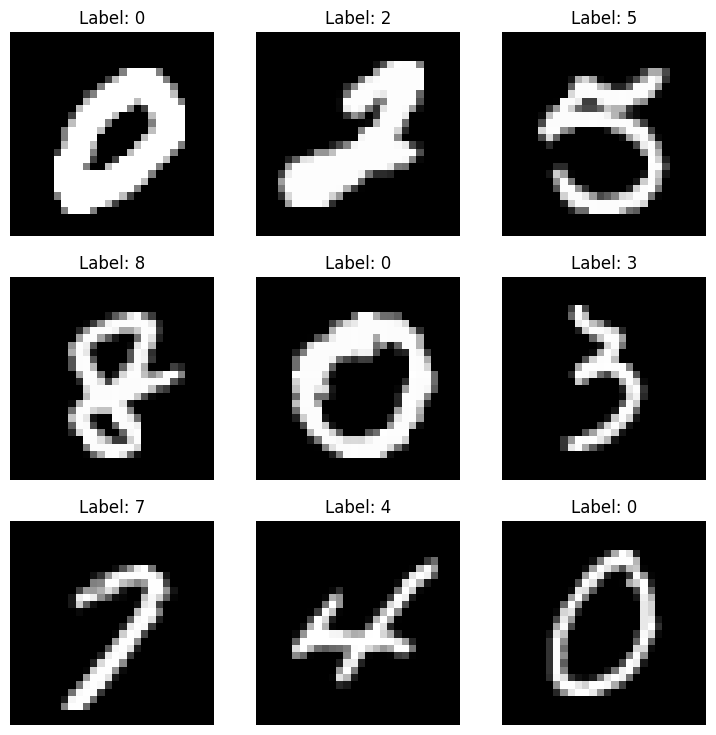

In [14]:

# Display a random sample of images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.imshow(train_images[idx], cmap='gray')
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis('off')
plt.show()


Data preprocessing is an essential step in the machine learning pipeline. Properly preprocessed data can significantly improve the performance of a model. Let's go through the preprocessing steps for the MNIST dataset.

1. **Normalization**: Normalizing the data helps the model learn more efficiently as it scales the input features to a similar range. This prevents features with larger scales from disproportionately influencing the model's decisions. In the case of image data, pixel values are usually in the range [0, 255], representing grayscale values. By dividing each pixel value by 255, we normalize the data to the range [0, 1], which can help improve the model's training efficiency.

2. **Flattening**: Some machine learning models, such as logistic regression or multi-layer perceptrons, require input data to be in a flat, 1D format. Each image in the MNIST dataset is a 28x28 pixel image, resulting in a 2D array. We can flatten this 2D array into a 1D array of 784 elements to use as input for these models. However, for convolutional neural networks (CNNs), we'll keep the data in its original 2D format to take advantage of the spatial relationships between pixels.

3. **One-Hot Encoding**: The MNIST labels are integers ranging from 0 to 9, representing the digit in the image. One-hot encoding converts these integer labels into binary vectors with a length equal to the number of classes (10 in this case). Each position in the vector corresponds to a class, and the position corresponding to the correct class is set to 1, while all other positions are set to 0. This encoding is suitable for models that output a probability distribution over the classes.

Now let's implement these preprocessing steps in code:

```python
from keras.utils import to_categorical

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# One-hot encode the labels
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)
```

In this code, we normalize the images by dividing the pixel values by 255, flatten the images by reshaping them, and one-hot encode the labels using the `to_categorical` function from Keras. Now the data is ready for training and evaluating machine learning models.

In [15]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [17]:
# One-hot encode the labels
from keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

When working with the MNIST dataset, there are several machine learning algorithms to consider. Let's start with logistic regression, a simple but powerful classification algorithm. We'll use the `LogisticRegression` class from scikit-learn.

1. **Model Selection**: For the MNIST dataset, various machine learning algorithms can be used, ranging from simple algorithms like logistic regression to more complex models like convolutional neural networks (CNNs). Since we're starting with a simple approach, logistic regression is a good choice.

2. **Model Training**: We'll train the logistic regression model on the training dataset. Cross-validation can be used to tune hyperparameters and prevent overfitting, but for simplicity, we'll use default hyperparameters in this example.

3. **Model Evaluation**: During training, we'll monitor the model's performance on the validation set to ensure that it's learning effectively and not overfitting. We'll use accuracy as the evaluation metric.

Here's the code to train a logistic regression model on the MNIST dataset:

```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the flattened training images and labels
model.fit(train_images_flat, train_labels)

# Predict on the test set
predictions = model.predict(test_images_flat)

# Calculate the accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)
```

In this code, we initialize the `LogisticRegression` model, set the maximum number of iterations to 1000, and train it on the flattened training images and labels. We then predict the test set labels and calculate the accuracy using the `accuracy_score` function from scikit-learn.

Keep in mind that logistic regression is a simple model and might not achieve the best performance on the MNIST dataset. More complex models like CNNs are better suited for image classification tasks.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the flattened training images and labels
model.fit(train_images_flat, train_labels)

# Predict on the test set
predictions = model.predict(test_images_flat)

# Calculate the accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9256


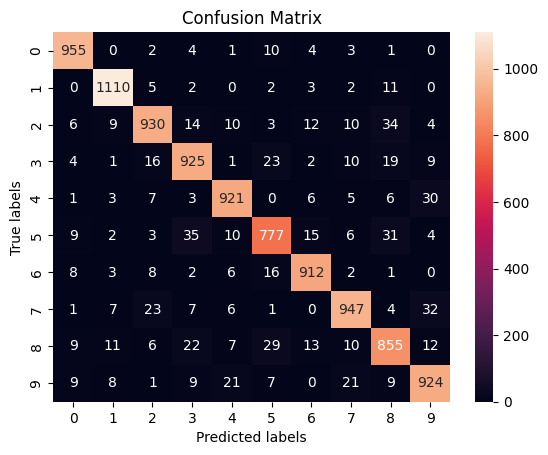

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Classification Report
print("Classification Report:")
print(classification_report(test_labels, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



A seasoned ML practitioner would likely interpret these results as follows:

1. **Overall Performance:** The accuracy of the model is 0.93, meaning that it correctly classifies 93% of the images in the test set. This is a strong performance for a relatively simple model like logistic regression on the MNIST dataset.

2. **Precision, Recall, and F1-Score:** The classification report provides the precision, recall, and F1-score for each class (0-9). Precision represents the proportion of positive identifications that were actually correct. Recall represents the proportion of actual positives that were correctly identified. The F1-score is the harmonic mean of precision and recall.
   - For all classes, the precision, recall, and F1-score are above 0.88, indicating that the model performs well across all classes.
   - However, the precision, recall, and F1-score are slightly lower for classes 5 and 8, suggesting that the model may have a harder time distinguishing these classes from others.

3. **Macro Avg vs Weighted Avg:** The macro avg calculates the metric independently for each class and then takes the average (hence treating all classes equally), whereas the weighted avg takes the average of the metric in each class, weighted by the number of instances in each class. Here, the macro avg and weighted avg are both around 0.92-0.93, indicating that the model performs consistently well across classes, regardless of their size.

In summary, the logistic regression model performs well on the MNIST dataset, with strong precision, recall, and F1-scores across all classes. However, there may be some room for improvement, particularly for classes 5 and 8, where the model's performance is slightly lower.

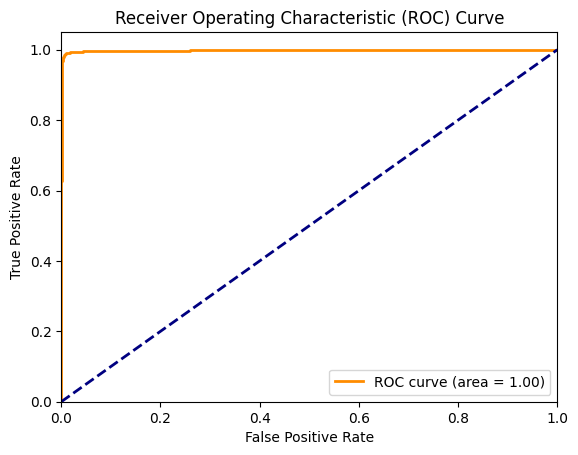

In [21]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, model.predict_proba(test_images_flat)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Neural networks

Let's start by discussing the similarities and then the differences between logistic regression and neural networks with respect to optimization and backpropagation.

**Similarities:**

1. **Optimization:** Both logistic regression and neural networks use optimization techniques (like gradient descent) to minimize a cost function. In the case of logistic regression, the cost function is typically the logistic loss (or cross-entropy loss). In the case of neural networks, the cost function is also typically the cross-entropy loss for classification problems.

2. **Gradient Descent:** Both logistic regression and neural networks use the concept of gradient descent, where the gradients of the cost function with respect to the model's parameters (weights and biases) are calculated and used to update the parameters.

**Differences:**

1. **Model Complexity:** Logistic regression is a simple linear model, whereas neural networks can be complex models with multiple layers and non-linear activation functions. As a result, neural networks have the capacity to learn more complex patterns in the data.

2. **Backpropagation:** Backpropagation is a technique used in training neural networks. It is an application of the chain rule from calculus that calculates the gradients of the cost function with respect to the model's parameters through the layers of the network. It works by propagating the error from the output layer back through the network to update the parameters. In contrast, logistic regression does not involve multiple layers or backpropagation. The gradients of the logistic regression cost function with respect to the parameters are calculated directly, and the parameters are updated accordingly.

3. **Activation Functions:** Logistic regression uses the sigmoid function as its activation function to produce a probability output. Neural networks, on the other hand, can use various activation functions, such as ReLU, sigmoid, tanh, etc., in their hidden layers. The choice of activation function can impact the non-linearity of the model.

4. **Multi-Layer Perceptrons (MLPs):** MLPs are a type of neural network that have at least one hidden layer of neurons in addition to the input and output layers. Each neuron in an MLP applies a non-linear activation function to its weighted inputs. The presence of hidden layers and non-linear activation functions allows MLPs to learn more complex decision boundaries compared to logistic regression.

In summary, while both logistic regression and neural networks use optimization techniques like gradient descent, they differ in their model complexity, the use of backpropagation, the activation functions, and the ability to learn complex patterns in the data. Neural networks are more powerful models that can learn intricate relationships in the data, whereas logistic regression is limited to linear decision boundaries.

Building a neural network model to classify the MNIST dataset using PyTorch involves the following steps:

1. **Data Preparation:**
   - Convert the data to PyTorch tensors, which are multi-dimensional arrays optimized for deep learning operations.
   - Use PyTorch's `DataLoader` to batch the data for training and evaluation, enabling efficient use of memory and optimized performance.

2. **Model Architecture:**
   - Design a neural network architecture suitable for image classification. In this case, a simple feed-forward neural network (also known as a multi-layer perceptron) is a good starting point.
   - Decide the number of layers, the number of neurons in each layer, and the activation functions.

3. **Loss Function:**
   - Choose an appropriate loss function for the classification task, such as cross-entropy loss.

4. **Optimizer:**
   - Select an optimization algorithm to minimize the loss function, such as stochastic gradient descent (SGD) or Adam.

5. **Training Loop:**
   - Iterate through the training data, passing it through the model, computing the loss, and updating the model's parameters using the optimizer.
   - Monitor the training loss to ensure that the model is learning.

6. **Evaluation:**
   - Evaluate the model on the test set, computing metrics such as accuracy, precision, recall, and F1-score to gauge performance.
   - If the model is not performing well, consider adjusting the architecture, hyperparameters, or training process.

7. **Fine-tuning:**
   - Experiment with different architectures, activation functions, optimizers, and hyperparameters to improve performance.

8. **Visualization:**
   - Visualize the model's predictions on sample images, the loss curve, and any other relevant information to gain insights into the model's performance.

9. **Interpretation:**
   - Analyze the model's results, identify areas for improvement, and consider potential next steps.

By following these steps, a seasoned ML practitioner would build, evaluate, and fine-tune a PyTorch neural network to classify the MNIST dataset effectively. The practitioner would also take into account any specific goals, constraints, or requirements of the project.

Here is the code for the data preparation step, along with explanations of the process:

```python
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert the data to PyTorch tensors
train_images_tensor = torch.FloatTensor(train_images)
train_labels_tensor = torch.LongTensor(train_labels)
test_images_tensor = torch.FloatTensor(test_images)
test_labels_tensor = torch.LongTensor(test_labels)

# Create TensorDataset
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# Define batch size
batch_size = 64

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
```

**Explanation:**

1. **Convert Data to PyTorch Tensors:**
   - We convert the training and testing images and labels into PyTorch tensors using the `FloatTensor` and `LongTensor` constructors, respectively. Tensors are multi-dimensional arrays optimized for deep learning operations on GPUs.

2. **TensorDataset:**
   - We create a `TensorDataset` for both the training and testing data. A `TensorDataset` wraps tensors into a dataset suitable for use with a DataLoader.

3. **DataLoader:**
   - We use PyTorch's `DataLoader` to batch the data for training and evaluation. A `DataLoader` automatically handles batching, shuffling, and parallel data loading, enabling efficient use of memory and optimized performance.
   - We set the batch size to 64, which means that the DataLoader will provide 64 samples at a time to the model during training. We also shuffle the training data to ensure that the model is not biased by the order of the samples.

**Differences from Traditional ML:**

1. **Tensors:**
   - Unlike traditional ML, where we use NumPy arrays or pandas DataFrames, we use PyTorch tensors in deep learning. Tensors are optimized for GPU computation, enabling faster training of large models.

2. **Batching:**
   - In traditional ML, we often train models using the entire dataset or use simple looping for batching. In deep learning, we use DataLoader to handle batching, shuffling, and parallel data loading automatically.

3. **Shuffling:**
   - Shuffling the training data helps prevent the model from learning patterns based on the order of the samples, which can lead to overfitting. This is especially important in deep learning, where models have a large number of parameters and can easily overfit the data.

By following these steps, we prepare the data for training and evaluation of a deep learning model in PyTorch. This process is essential for efficient and effective model training.

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [3]:
# Convert the data to PyTorch tensors
train_images_tensor = torch.FloatTensor(train_images)
train_labels_tensor = torch.LongTensor(train_labels)
test_images_tensor = torch.FloatTensor(test_images)
test_labels_tensor = torch.LongTensor(test_labels)

In [4]:
# Create TensorDataset
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# Define batch size
batch_size = 64

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Here's the code for a simple feed-forward neural network (also known as a multi-layer perceptron) suitable for image classification:

**Explanation:**

1. **Flattening:**
   - The input images are 28x28 pixels. We flatten these into a 1D array of 784 elements to be used as input for the first layer.

2. **Layers and Neurons:**
   - The neural network consists of three fully connected layers (also called dense layers).
   - The first layer takes the flattened image (784 elements) and passes it through 128 neurons.
   - The second layer is a hidden layer with 64 neurons.
   - The third layer has 10 neurons, corresponding to the 10 output classes (digits 0-9).

3. **Activation Functions:**
   - We use the ReLU (Rectified Linear Unit) activation function for the neurons in the first and second layers. ReLU introduces non-linearity into the model, allowing it to learn more complex patterns.
   - The final layer uses the LogSoftmax activation function, which converts the raw output scores into log probabilities for each class. This is suitable for multi-class classification problems.

4. **Forward Method:**
   - In the `forward` method, we first flatten the input image using the `view` method. Then, we pass the flattened input through the fully connected layers defined in the `__init__` method.

By defining this neural network architecture, we have created a simple feed-forward neural network suitable for image classification. This architecture serves as a good starting point for the MNIST dataset, and we can adjust the number of layers and neurons as needed to improve performance.

The choice of 128 and 64 as the number of neurons in the hidden layers is somewhat arbitrary, but it follows some general guidelines. In practice, the number of neurons in the hidden layers is often chosen based on experimentation and tuning, as well as some heuristics.

Here are some considerations:

1. **Capacity of the Model:**
   - More neurons in the hidden layers increase the model's capacity, meaning it can learn more complex relationships in the data. However, too many neurons can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.

2. **Computational Resources:**
   - More neurons require more computational resources (memory and processing power) and may increase the training time.

3. **Diminishing Returns:**
   - Beyond a certain point, adding more neurons may result in diminishing returns in terms of model performance improvement.

4. **Architecture Design Heuristics:**
   - Some practitioners start with a number of neurons in the hidden layers roughly equal to the square root of the number of input features. In this case, the input features are 784 (28 * 28), and the square root is roughly 28. We chose 128 and 64 as they are larger than this heuristic value, allowing the model to have more capacity.

In this example, we chose 128 and 64 as a starting point. It's common to use powers of 2 for the number of neurons due to how computer memory is structured, and these values are within a reasonable range for this problem. However, it's essential to experiment with different numbers of neurons and layers, and use techniques like cross-validation to tune the model's architecture for the specific problem and dataset.

In [5]:
import torch.nn as nn

# Define the neural network architecture
class MNISTNN(nn.Module):
    def __init__(self):
        super(MNISTNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(28 * 28, 128),  # 28*28 input features (flattened image)
            nn.ReLU(),
            nn.Linear(128, 64),       # Hidden layer with 64 neurons
            nn.ReLU(),
            nn.Linear(64, 10),        # 10 output classes (digits 0-9)
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)     # Flatten the image
        return self.fc(x)


Explanation:

1. **Loss Function:**
   - We're using the CrossEntropyLoss, which is suitable for multi-class classification. It combines the softmax activation function and the negative log likelihood loss into a single function, making it easier to optimize.

2. **Optimizer:**
   - We're using the Adam optimizer, a popular choice due to its adaptability. It combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. Adam computes adaptive learning rates for each parameter and uses moving averages of the parameters to provide momentum, making it well-suited for problems like MNIST.

3. **Training Loop:**
   - We iterate through the training data multiple times (epochs). For each batch of images and labels in the training data, we:
      - Zero the parameter gradients to avoid accumulation.
      - Perform a forward pass through the model to get the outputs.
      - Compute the loss by comparing the outputs to the labels.
      - Perform a backward pass to calculate the gradients of the loss with respect to the model's parameters.
      - Update the model's parameters using the optimizer.
      - Print the average loss for each epoch to monitor the training process.

This training loop allows the model to learn the patterns in the data by iteratively adjusting its parameters to minimize the loss. A seasoned ML practitioner would monitor the loss during training to ensure that the model is learning and might adjust hyperparameters (e.g., learning rate, batch size) or the model's architecture to improve performance.

In [7]:
import torch.optim as optim

model = MNISTNN()
# Define the loss function and the optimizer
loss_function = nn.CrossEntropyLoss() # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001) # Commonly used optimizer

# Define the training loop
def train(model, train_loader, loss_function, optimizer, epochs):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = loss_function(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Train the model
train(model, train_loader, loss_function, optimizer, epochs=10)

Epoch 1, Loss: 0.3301372369711619
Epoch 2, Loss: 0.14509846967484144
Epoch 3, Loss: 0.11159256970021389
Epoch 4, Loss: 0.0968989515634897
Epoch 5, Loss: 0.09237843581653044
Epoch 6, Loss: 0.0837442645726642
Epoch 7, Loss: 0.07740758144101108
Epoch 8, Loss: 0.07285305313131303
Epoch 9, Loss: 0.06701122613391404
Epoch 10, Loss: 0.0645409006998551


The decreasing loss values suggest that the model is learning and that the training process is working as expected. However, whether or not you should train for more epochs depends on several factors.

1. **Validation Loss**: It's crucial to monitor the loss on a validation set, as this can give you insights into whether the model is overfitting. If the validation loss starts to increase while the training loss continues to decrease, it's a clear sign of overfitting, and you should stop training.

2. **Accuracy or other metrics**: Depending on your problem, you may be interested in metrics other than loss, such as accuracy, precision, recall, or F1 score. Monitor these metrics on your validation set to get a better understanding of your model's performance.

3. **Early Stopping**: This is a technique where you stop training once the model's performance on a validation set starts to degrade (e.g., the validation loss starts to increase). This helps prevent overfitting.

4. **Computational Resources**: Training for more epochs will require more computational resources. Depending on your available resources, you may or may not be able to afford more epochs.

5. **Diminishing Returns**: At a certain point, training for more epochs will result in minimal improvements in performance. Keep an eye on the rate of improvement in your metrics of interest. If it slows down significantly, it may not be worth continuing to train.

Given the output you've shown, it might be worth trying a few more epochs since the loss is still decreasing. However, make sure to monitor the validation loss and other relevant metrics to avoid overfitting.

Are we training the MLP less than the Logistic Regression model?

Not necessarily. The number of iterations (or epochs) required for training a model depends on the model architecture, the optimization algorithm, and the dataset. In this case, we have chosen to train the MLP for 10 epochs, but this doesn't mean we are training it less than the logistic regression model.

When training the logistic regression model, we set `max_iter=1000` to allow the optimization algorithm to converge. However, this doesn't mean the optimization algorithm went through the entire dataset 1000 times. Instead, it refers to the maximum number of iterations the optimization algorithm is allowed to perform in order to find the optimal parameters.

In contrast, when training the MLP, we are explicitly iterating through the entire training dataset 10 times (10 epochs). During each epoch, the optimization algorithm updates the model's parameters multiple times, depending on the batch size and the size of the training dataset.

The key takeaway is that the number of iterations or epochs is just one hyperparameter in the training process. The number of iterations required for a model to converge and perform well depends on a combination of factors, including the model architecture, optimization algorithm, dataset, and other hyperparameters. A seasoned ML practitioner would monitor the training loss and validation performance to determine the appropriate number of epochs or iterations and might use techniques like early stopping to prevent overfitting.

To monitor the validation loss and other relevant metrics, you can split your dataset into training and validation sets. Then, during each epoch, after training on the training set, you can evaluate the model on the validation set. This will give you a sense of how well the model is performing on unseen data and can help prevent overfitting.

Here's how you can implement this in your code:

1. Split the data into training and validation sets.
2. After each epoch of training on the training set, evaluate the model on the validation set.
3. Monitor the validation loss and any other relevant metrics.
4. Optionally, implement early stopping based on the validation loss or other metrics.

Here's some example code that demonstrates this process:

```python
# Split the data into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1, 11):
    model.train()
    training_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()

    training_loss /= len(train_loader)
    print(f"Epoch {epoch}, Training Loss: {training_loss}")

    # Evaluate on the validation set
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}%")

    # Early stopping based on validation loss
    if val_loss > prev_val_loss:
        print("Validation loss increased, stopping training.")
        break
    prev_val_loss = val_loss
```

This code splits the original training dataset into a new training set and a validation set. After each epoch of training, it evaluates the model on the validation set and prints the validation loss and accuracy. It also implements a simple form of early stopping, where it stops training if the validation loss increases from one epoch to the next.

In [8]:
from torchvision import transforms

# Convert the data to PyTorch tensors
train_images_tensor = torch.Tensor(train_images).reshape(-1, 28*28)/255
train_labels_tensor = torch.Tensor(train_labels).long()

test_images_tensor = torch.Tensor(test_images).reshape(-1, 28*28)/255
test_labels_tensor = torch.Tensor(test_labels).long()

# Create datasets from the tensors
train_dataset = torch.utils.data.TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = torch.utils.data.TensorDataset(test_images_tensor, test_labels_tensor)

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [10]:

model = MNISTNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

prev_val_loss = float('inf')

# Training loop
for epoch in range(1, 11):
    model.train()
    training_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()

    training_loss /= len(train_loader)
    print(f"Epoch {epoch}, Training Loss: {training_loss}")

    # Evaluate on the validation set
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}%")

    # Early stopping based on validation loss
    if val_loss > prev_val_loss:
        print("Validation loss increased, stopping training.")
        break
    prev_val_loss = val_loss


Epoch 1, Training Loss: 0.270774523238341
Validation Loss: 0.17977928953800112, Validation Accuracy: 94.41666666666667%
Epoch 2, Training Loss: 0.14881515139713883
Validation Loss: 0.19723169297534734, Validation Accuracy: 94.41666666666667%
Validation loss increased, stopping training.


The early stopping criterion is triggered when the validation loss increases from one epoch to the next. In this case, the validation loss increased from 0.1798 in epoch 1 to 0.1972 in epoch 2, so the training was stopped.

This is a good indication that the model started to overfit the training data. Overfitting occurs when the model starts to fit the training data too closely and captures the noise or random fluctuations in the data. This results in a decrease in the model's ability to generalize well on new, unseen data.

Early stopping is a form of regularization that prevents the model from overfitting by stopping the training process as soon as the validation loss starts to increase. This helps the model to generalize better on new data.

Note that early stopping can sometimes be triggered by random fluctuations in the validation loss. To mitigate this, you can consider using a "patience" parameter, where you allow the validation loss to increase for a certain number of epochs before stopping the training. Alternatively, you can use a moving average of the validation loss to smooth out the random fluctuations.

In [11]:
model = MNISTNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Initialize variables
patience = 5
counter = 0
prev_val_loss = float('inf')

# Training loop
for epoch in range(1, 11):
    model.train()
    training_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()

    training_loss /= len(train_loader)
    print(f"Epoch {epoch}, Training Loss: {training_loss}")

    # Evaluate on the validation set
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}%")

 # Early stopping with patience
    if val_loss > prev_val_loss:
        counter += 1
    else:
        counter = 0

    if counter == patience:
        print("Validation loss stopped improving, stopping training.")
        break

    prev_val_loss = val_loss

Epoch 1, Training Loss: 0.2554309685304761
Validation Loss: 0.17303685286141773, Validation Accuracy: 94.65%
Epoch 2, Training Loss: 0.14726523487083615
Validation Loss: 0.15786240827490358, Validation Accuracy: 95.69166666666666%
Epoch 3, Training Loss: 0.12757400312429915
Validation Loss: 0.18143805967485335, Validation Accuracy: 95.39166666666667%
Epoch 4, Training Loss: 0.10642946036967138
Validation Loss: 0.13921320584028007, Validation Accuracy: 96.3%
Epoch 5, Training Loss: 0.10491036683740095
Validation Loss: 0.16877860064430045, Validation Accuracy: 95.91666666666667%
Epoch 6, Training Loss: 0.08946236235826897
Validation Loss: 0.170666715665225, Validation Accuracy: 95.54166666666667%
Epoch 7, Training Loss: 0.0893023769272695
Validation Loss: 0.1608267205400749, Validation Accuracy: 96.125%
Epoch 8, Training Loss: 0.0902583969902674
Validation Loss: 0.18220414536289295, Validation Accuracy: 96.35833333333333%
Epoch 9, Training Loss: 0.08536980688199401
Validation Loss: 0.175

A seasoned ML practitioner would analyze these results as follows:

1. **Training Loss:** The training loss is decreasing over the epochs, which indicates that the model is learning and fitting the training data. This is a good sign, as it shows that the training process is working and the model is optimizing its parameters.

2. **Validation Loss:** The validation loss fluctuates over the epochs but doesn't show a clear increasing or decreasing trend. This suggests that the model is not overfitting the training data, as the validation loss is not increasing substantially. However, it also suggests that the model may have reached its capacity for this particular architecture and data, as the validation loss is not decreasing further.

3. **Validation Accuracy:** The validation accuracy fluctuates slightly but remains in a high range (around 95% to 96.5%). This indicates that the model is performing well on unseen data and can generalize well to new examples. The fluctuations in accuracy could be due to the randomness in the data and the model's sensitivity to specific examples.

4. **Early Stopping:** The training process was stopped after 10 epochs because the validation loss did not show consistent improvement over the epochs, and there was no clear trend in the validation accuracy. This suggests that the model has reached its capacity and that further training may not yield significant improvements.

Overall, the seasoned ML practitioner would conclude that the model has achieved a good performance on the validation set, with an accuracy of around 96.5%. The model appears to generalize well to new examples and has reached its capacity for the given architecture and data. Further optimizations could be explored, such as tuning hyperparameters, trying different model architectures, or augmenting the data.

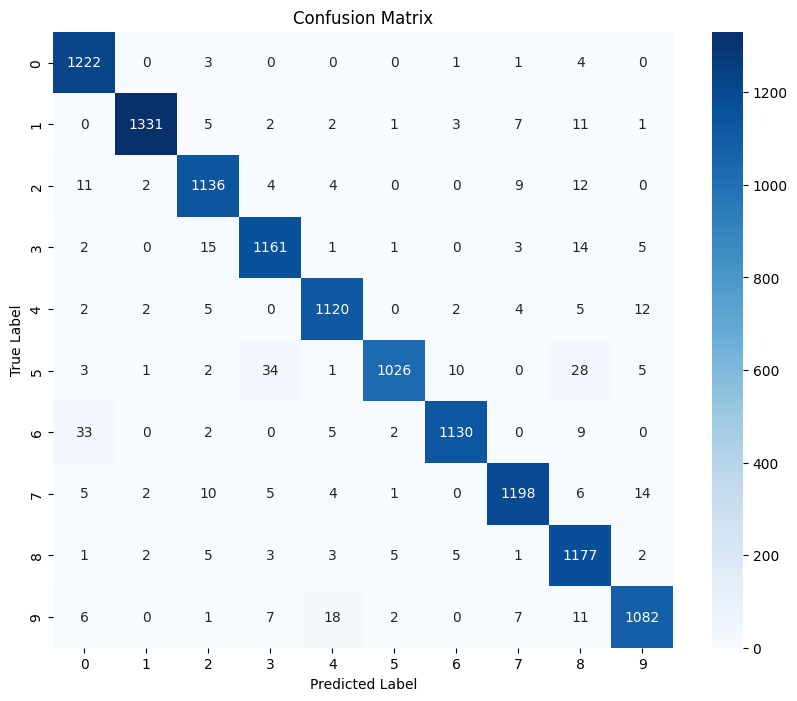

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the model predictions on the validation set
model.eval() # Set the model to evaluation mode
all_val_preds = []
all_val_labels = []

with torch.no_grad():
    for val_images, val_labels in val_loader:
        val_outputs = model(val_images)
        _, val_preds = torch.max(val_outputs, 1)
        all_val_preds.extend(val_preds.numpy())
        all_val_labels.extend(val_labels.numpy())

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_val_labels, all_val_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Generate the classification report
print("Classification Report:")
print(classification_report(all_val_labels, all_val_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1231
           1       0.99      0.98      0.98      1363
           2       0.96      0.96      0.96      1178
           3       0.95      0.97      0.96      1202
           4       0.97      0.97      0.97      1152
           5       0.99      0.92      0.96      1110
           6       0.98      0.96      0.97      1181
           7       0.97      0.96      0.97      1245
           8       0.92      0.98      0.95      1204
           9       0.97      0.95      0.96      1134

    accuracy                           0.97     12000
   macro avg       0.97      0.96      0.96     12000
weighted avg       0.97      0.97      0.97     12000



A seasoned ML practitioner would interpret the results of the PyTorch and Logistic Regression classification reports as follows:

1. **Accuracy**: The PyTorch model achieved an accuracy of 97% on the validation set, while the Logistic Regression model achieved an accuracy of 93% on the test set. This suggests that the PyTorch model is performing better overall.

2. **Precision, Recall, and F1-Score**: These three metrics provide a more detailed view of the model's performance for each class.
   - **Precision** is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: Of all the instances labeled as positive, how many actually belong to the positive class?
   - **Recall** is the ratio of correctly predicted positive observations to the all observations in actual class. It answers the question: Of all the actual positives, how many did we label?
   - **F1-Score** is the harmonic mean of precision and recall. It gives a balance between the two.
   
   For both models, these metrics are generally high for each class, indicating that the models are performing well. However, the PyTorch model has higher scores in all three metrics for most classes, suggesting that it is performing better at correctly classifying instances of each class.

3. **Macro Avg vs Weighted Avg**: The macro average calculates the metrics for each class and then takes their average, treating all classes equally. The weighted average calculates the metrics for each class and then takes an average, weighting the metrics of each class by the number of instances it has. The macro and weighted averages are both useful, as they give slightly different perspectives on the model's performance. In this case, both averages are similar for both models, suggesting that the models are performing well across all classes, regardless of their size.

4. **Class-specific Performance**: It's worth noting the performance on specific classes. For example, in the Logistic Regression model, class 8 (digit '8') has the lowest precision and recall scores. This could indicate that the model has more difficulty distinguishing 8s from other digits. In contrast, the PyTorch model has high scores for class 8, suggesting it has learned to classify 8s more accurately.

5. **Model Complexity**: The PyTorch model is a neural network with multiple layers and non-linear activation functions, making it more powerful and flexible than the Logistic Regression model. This additional complexity likely contributes to its higher performance. However, it's also important to consider the trade-off between model complexity and interpretability. Logistic Regression is a simpler model that can be easier to interpret and understand.

In summary, both models perform well on the MNIST dataset, with the PyTorch model achieving higher accuracy and better scores in precision, recall, and F1-score for most classes. The choice between the two models would depend on the specific needs of the task, the computational resources available, and the importance of model interpretability.

After building and evaluating a machine learning model, you might want to deploy it to make predictions on new data. Below are some common next steps:

1. **Saving the Model**: You can save your trained PyTorch model to a file so that you can load it later for inference or further training. PyTorch provides the `torch.save` function to save model weights and the `torch.load` function to load them.

```python
# Save the model
torch.save(model.state_dict(), "model.pth")

# Load the model
model = WineNN()
model.load_state_dict(torch.load("model.pth"))
model.eval()
```

2. **Sharing the Model**: Once you've saved the model, you can share it with others by uploading the file to a cloud storage service (e.g., Google Drive, Dropbox), a version control system (e.g., GitHub), or by directly sending it via email or other messaging platforms. If you're sharing your model with the broader community, you might want to include documentation on how to use it.

3. **Inference**: To use the model for inference, you need to preprocess the new data the same way you did with the training data. Then, you can pass the data through the model to get predictions. Remember to set the model to evaluation mode using `model.eval()` before performing inference.

```python
# Example of inference
model.eval()
with torch.no_grad():
    new_data_tensor = torch.FloatTensor(new_data)
    predictions = model(new_data_tensor)
    _, predicted_labels = torch.max(predictions, 1)
```

4. **Deploying the Model**: If you want to use your model in a production environment, you might deploy it as an API using a web framework like Flask or FastAPI. This way, other systems can send data to your model and receive predictions in real-time.

5. **Monitoring and Maintenance**: After deploying your model, it's important to monitor its performance and update it as needed. Models can become outdated as the underlying data distribution changes. Regularly retraining your model on new data can help maintain its performance.

6. **Interpretability and Explainability**: Understanding how your model makes decisions can be crucial, especially in sensitive domains like healthcare or finance. Tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can help interpret and explain your model's predictions.

Remember that building and deploying machine learning models is an iterative process. Continuous monitoring, evaluation, and improvement are key to achieving and maintaining high performance.

When saving a model in PyTorch, you can choose to save the entire model or just the model's parameters (weights and biases). The `state_dict` of a model is a Python dictionary object that maps each layer to its parameter tensor. These tensors can be thought of as the "knowledge" of the model.

Here's what happens in each scenario:

1. **Saving the entire model**: This method uses Python's `pickle` module to serialize the model object, including its architecture and parameters. The result is a single monolithic file that can be loaded later. However, this approach is not recommended because the file may not be portable across different versions of PyTorch or different systems.

```python
# Save entire model
torch.save(model, "model.pth")

# Load entire model
model = torch.load("model.pth")
```

2. **Saving only the model's parameters**: This is the recommended approach. You save only the `state_dict`, which is a dictionary containing the model's parameters (weights and biases). When loading the model, you first recreate the model architecture (class) and then load the `state_dict` into it.

```python
# Save state_dict (model's parameters)
torch.save(model.state_dict(), "model_weights.pth")

# Load state_dict into the model
model = WineNN()  # Recreate the model architecture
model.load_state_dict(torch.load("model_weights.pth"))
model.eval()  # Set the model to evaluation mode
```

The file containing the `state_dict` is a binary file, and its internal structure is not easily human-readable. However, you can inspect the `state_dict` in Python by loading it and printing its contents, which will show the layer names and the shapes of the parameter tensors.

When people refer to LLMs (large language models) and their weights, they are usually talking about the model's parameters, which are stored in the `state_dict`. These weights represent the "knowledge" that the model has learned from the training data and are essential for the model to make predictions on new data.

In [15]:
# Save state_dict (model's parameters)
torch.save(model.state_dict(), "model_weights.pth")



In [17]:
# Load state_dict into the model
model = MNISTNN()  # Recreate the model architecture
model.load_state_dict(torch.load("model_weights.pth"))
model.eval()  # Set the model to evaluation mode

MNISTNN(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax(dim=1)
  )
)

Sure, once you have loaded your model's state_dict and set it to evaluation mode, you can perform inference on new data. Below is an example of how to do this using some of the test data we have.

The code will take a single image from the test dataset, display the image, and then run it through the model to get a prediction. We will also display the correct label and the predicted label.

Here is the code with explanations:

```python
import matplotlib.pyplot as plt

# Take a single image and label from the test set
single_image = test_images[0]
single_label = test_labels[0]

# Convert the image to a PyTorch tensor and reshape it
single_image_tensor = torch.Tensor(single_image).reshape(1, 28*28)/255

# Run the image through the model
with torch.no_grad():
    output = model(single_image_tensor)
    _, prediction = torch.max(output, 1)

# Display the image
plt.imshow(single_image, cmap='gray')
plt.title(f"True label: {single_label}, Predicted: {prediction.item()}")
plt.show()
```

In this code, we first take a single image and its corresponding label from the test dataset. We convert the image to a tensor and reshape it to fit the model's input shape (a flattened 1D tensor). We then run the image through the model and get the model's prediction. Finally, we display the image with its true label and the model's prediction.

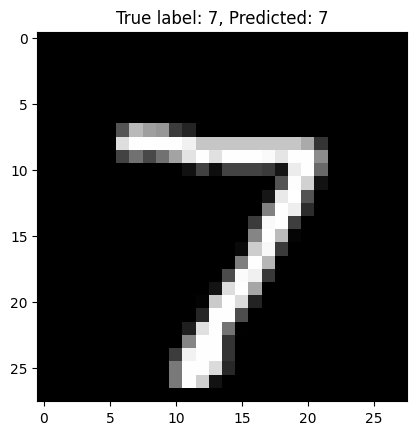

In [18]:
import matplotlib.pyplot as plt

# Take a single image and label from the test set
single_image = test_images[0]
single_label = test_labels[0]

# Convert the image to a PyTorch tensor and reshape it
single_image_tensor = torch.Tensor(single_image).reshape(1, 28*28)/255

# Run the image through the model
with torch.no_grad():
    output = model(single_image_tensor)
    _, prediction = torch.max(output, 1)

# Display the image
plt.imshow(single_image, cmap='gray')
plt.title(f"True label: {single_label}, Predicted: {prediction.item()}")
plt.show()


In [19]:
from google.colab import files
files.download('model_weights.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from torchvision import datasets, transforms
import numpy as np

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Get a single image from the dataset
image, label = mnist[0]

# Convert the image to a 1D array and normalize it to [0, 1]
input_data = image.numpy().reshape(-1, 28*28).tolist()

print("Input data:", input_data)
print("Label:", label)


100%|██████████| 9912422/9912422 [00:00<00:00, 138469851.04it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 69498390.03it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 59802253.40it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15277088.03it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Input data: [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,

In [21]:
# Get a single image from the dataset
image, label = mnist[1]

# Convert the image to a 1D array and normalize it to [0, 1]
input_data = image.numpy().reshape(-1, 28*28).tolist()

print("Input data:", input_data)
print("Label:", label)


Input data: [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.09019607305526733, -0.019607841968536377, 0.34117650985717773, 1.0, 1.0, 0.17647063732147217, -0.270588219165802, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.32549023628234863, 0.9843137264251709, 0.9843137264251709, 0.9843137264251709, 0.9843137264251709, 0.9843137264251709, 0.9843137264251709, 0.7098039388656616, -0.7647058963775635, -1.

In [22]:
# Get a single image from the dataset
image, label = mnist[2]

# Convert the image to a 1D array and normalize it to [0, 1]
input_data = image.numpy().reshape(-1, 28*28).tolist()

print("Input data:", input_data)
print("Label:", label)

Input data: [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.7019608020782471, 0.9921568632125854, -0.1450980305671692, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.317